In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option("display.max_columns", None)

%matplotlib inline

### Load and process data

In [2]:
path1 = "/Users/niharawarawita/Desktop/MSc Project/Data/Lili_Experiment/combined_stats_lili_nihara_version.csv"
df1 = pd.read_csv(path1)
df1.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1,max_Ax_Hand0,max_Ay_Hand0,max_Az_Hand0,max_Vx_Hand0,max_Vy_Hand0,max_Vz_Hand0,max_Jx_Hand0,max_Jy_Hand0,max_Jz_Hand0,mean_Ax_Hand0,mean_Ay_Hand0,mean_Az_Hand0,mean_Vx_Hand0,mean_Vy_Hand0,mean_Vz_Hand0,mean_Jx_Hand0,mean_Jy_Hand0,mean_Jz_Hand0,std_Ax_Hand0,std_Ay_Hand0,std_Az_Hand0,std_Vx_Hand0,std_Vy_Hand0,std_Vz_Hand0,std_Jx_Hand0,std_Jy_Hand0,std_Jz_Hand0,max_Ax_Hand1,max_Ay_Hand1,max_Az_Hand1,max_Vx_Hand1,max_Vy_Hand1,max_Vz_Hand1,max_Jx_Hand1,max_Jy_Hand1,max_Jz_Hand1,mean_Ax_Hand1,mean_Ay_Hand1,mean_Az_Hand1,mean_Vx_Hand1,mean_Vy_Hand1,mean_Vz_Hand1,mean_Jx_Hand1,mean_Jy_Hand1,mean_Jz_Hand1,std_Ax_Hand1,std_Ay_Hand1,std_Az_Hand1,std_Vx_Hand1,std_Vy_Hand1,std_Vz_Hand1,std_Jx_Hand1,std_Jy_Hand1,std_Jz_Hand1,max_w_Hand0,max_x_Hand0,max_y_Hand0,max_z_Hand0,max_AVx_Hand0,max_AVy_Hand0,max_AVz_Hand0,max_AAx_Hand0,max_AAy_Hand0,max_AAz_Hand0,max_AJx_Hand0,max_AJy_Hand0,max_AJz_Hand0,mean_w_Hand0,mean_x_Hand0,mean_y_Hand0,mean_z_Hand0,mean_AVx_Hand0,mean_AVy_Hand0,mean_AVz_Hand0,mean_AAx_Hand0,mean_AAy_Hand0,mean_AAz_Hand0,mean_AJx_Hand0,mean_AJy_Hand0,mean_AJz_Hand0,std_w_Hand0,std_x_Hand0,std_y_Hand0,std_z_Hand0,std_AVx_Hand0,std_AVy_Hand0,std_AVz_Hand0,std_AAx_Hand0,std_AAy_Hand0,std_AAz_Hand0,std_AJx_Hand0,std_AJy_Hand0,std_AJz_Hand0,max_w_Hand1,max_x_Hand1,max_y_Hand1,max_z_Hand1,max_AVx_Hand1,max_AVy_Hand1,max_AVz_Hand1,max_AAx_Hand1,max_AAy_Hand1,max_AAz_Hand1,max_AJx_Hand1,max_AJy_Hand1,max_AJz_Hand1,mean_w_Hand1,mean_x_Hand1,mean_y_Hand1,mean_z_Hand1,mean_AVx_Hand1,mean_AVy_Hand1,mean_AVz_Hand1,mean_AAx_Hand1,mean_AAy_Hand1,mean_AAz_Hand1,mean_AJx_Hand1,mean_AJy_Hand1,mean_AJz_Hand1,std_w_Hand1,std_x_Hand1,std_y_Hand1,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1
0,7,14,3,smoothness,105,3,medium,2,1,2021-08-05 13:21:31.481,2021-08-05 13:21:32.468,0.014043,0.018145,0.025135,0.024962,0.124478,0.045412,0.054746,0.013945,0.004187,0.006223,0.005950,0.007505,0.012084,0.007230,0.011521,0.003481,0.002145,0.001659,0.004676,0.004315,0.014600,0.009336,0.008187,0.005070,0.022729,0.315231,0.203971,0.151561,0.021636,0.991848,0.167736,0.051640,0.004759,0.024722,0.021191,0.014868,0.010039,0.190664,0.025540,0.007805,0.003827,0.029272,0.027726,0.020507,0.004441,0.163845,0.025293,0.008498,-0.850708,-0.068771,0.490311,0.000525,0.000406,0.000903,1.269531,1.220703,2.258301,-0.863979,-0.089162,0.468123,-0.000005,1.483398e-05,-1.191406e-05,-0.010928,-0.052313,0.060087,0.006994,0.008424,0.010178,0.000201,0.000180,0.000270,0.599364,0.630856,0.794158,1.023270,0.042786,-0.178879,0.001218,0.001529,0.001429,4.089355,5.468750,3.271484,0.970242,-0.011443,-0.239064,-0.000030,-8.115234e-06,0.000065,0.061211,0.036287,-0.170119,0.017187,0.014988,0.034359,0.000440,0.000417,0.000641,1.262790,1.374306,1.977670,0.179352,0.488418,0.160615,-0.840857,0.133141,0.061469,0.117029,4.332320,2.887801,19.812834,554.574503,316.450316,1338.775861,0.171550,0.486515,0.155002,-0.842509,-0.002358,-0.006487,-0.037808,-0.069210,0.040128,0.213198,-18.896953,-5.997847,29.264918,0.004033,0.001122,0.003172,0.000812,0.034035,0.027288,0.100030,1.808784,1.349269,

In [3]:
path2 = "/Users/niharawarawita/Desktop/MSc Project/Data/EMG_data_collection/combined_stats_nihara.csv"
df2 = pd.read_csv(path2)
df2.head()

df2['property_id'] = df2['property_id'] - 9

In [4]:
path = "/Users/niharawarawita/Desktop/MSc Project/Data/combined_datasets.csv"
combined_df = pd.read_csv(path)
combined_df.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1,max_Ax_Hand0,max_Ay_Hand0,max_Az_Hand0,max_Vx_Hand0,max_Vy_Hand0,max_Vz_Hand0,max_Jx_Hand0,max_Jy_Hand0,max_Jz_Hand0,mean_Ax_Hand0,mean_Ay_Hand0,mean_Az_Hand0,mean_Vx_Hand0,mean_Vy_Hand0,mean_Vz_Hand0,mean_Jx_Hand0,mean_Jy_Hand0,mean_Jz_Hand0,std_Ax_Hand0,std_Ay_Hand0,std_Az_Hand0,std_Vx_Hand0,std_Vy_Hand0,std_Vz_Hand0,std_Jx_Hand0,std_Jy_Hand0,std_Jz_Hand0,max_Ax_Hand1,max_Ay_Hand1,max_Az_Hand1,max_Vx_Hand1,max_Vy_Hand1,max_Vz_Hand1,max_Jx_Hand1,max_Jy_Hand1,max_Jz_Hand1,mean_Ax_Hand1,mean_Ay_Hand1,mean_Az_Hand1,mean_Vx_Hand1,mean_Vy_Hand1,mean_Vz_Hand1,mean_Jx_Hand1,mean_Jy_Hand1,mean_Jz_Hand1,std_Ax_Hand1,std_Ay_Hand1,std_Az_Hand1,std_Vx_Hand1,std_Vy_Hand1,std_Vz_Hand1,std_Jx_Hand1,std_Jy_Hand1,std_Jz_Hand1,max_w_Hand0,max_x_Hand0,max_y_Hand0,max_z_Hand0,max_AVx_Hand0,max_AVy_Hand0,max_AVz_Hand0,max_AAx_Hand0,max_AAy_Hand0,max_AAz_Hand0,max_AJx_Hand0,max_AJy_Hand0,max_AJz_Hand0,mean_w_Hand0,mean_x_Hand0,mean_y_Hand0,mean_z_Hand0,mean_AVx_Hand0,mean_AVy_Hand0,mean_AVz_Hand0,mean_AAx_Hand0,mean_AAy_Hand0,mean_AAz_Hand0,mean_AJx_Hand0,mean_AJy_Hand0,mean_AJz_Hand0,std_w_Hand0,std_x_Hand0,std_y_Hand0,std_z_Hand0,std_AVx_Hand0,std_AVy_Hand0,std_AVz_Hand0,std_AAx_Hand0,std_AAy_Hand0,std_AAz_Hand0,std_AJx_Hand0,std_AJy_Hand0,std_AJz_Hand0,max_w_Hand1,max_x_Hand1,max_y_Hand1,max_z_Hand1,max_AVx_Hand1,max_AVy_Hand1,max_AVz_Hand1,max_AAx_Hand1,max_AAy_Hand1,max_AAz_Hand1,max_AJx_Hand1,max_AJy_Hand1,max_AJz_Hand1,mean_w_Hand1,mean_x_Hand1,mean_y_Hand1,mean_z_Hand1,mean_AVx_Hand1,mean_AVy_Hand1,mean_AVz_Hand1,mean_AAx_Hand1,mean_AAy_Hand1,mean_AAz_Hand1,mean_AJx_Hand1,mean_AJy_Hand1,mean_AJz_Hand1,std_w_Hand1,std_x_Hand1,std_y_Hand1,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1
0,7,14,3,smoothness,1,3,medium,2,1,2021-08-05 13:21:31.481,2021-08-05 13:21:32.468,0.014043,0.018145,0.025135,0.024962,0.124478,0.045412,0.054746,0.013945,0.004187,0.006223,0.005950,0.007505,0.012084,0.007230,0.011521,0.003481,0.002145,0.001659,0.004676,0.004315,0.014600,0.009336,0.008187,0.005070,0.022729,0.315231,0.203971,0.151561,0.021636,0.991848,0.167736,0.051640,0.004759,0.024722,0.021191,0.014868,0.010039,0.190664,0.025540,0.007805,0.003827,0.029272,0.027726,0.020507,0.004441,0.163845,0.025293,0.008498,-0.850708,-0.068771,0.490311,0.000525,0.000406,0.000903,1.269531,1.220703,2.258301,-0.863979,-0.089162,0.468123,-0.000005,1.483398e-05,-1.191406e-05,-0.010928,-0.052313,0.060087,0.006994,0.008424,0.010178,0.000201,0.000180,0.000270,0.599364,0.630856,0.794158,1.023270,0.042786,-0.178879,0.001218,0.001529,0.001429,4.089355,5.468750,3.271484,0.970242,-0.011443,-0.239064,-0.000030,-8.115234e-06,0.000065,0.061211,0.036287,-0.170119,0.017187,0.014988,0.034359,0.000440,0.000417,0.000641,1.262790,1.374306,1.977670,0.179352,0.488418,0.160615,-0.840857,0.133141,0.061469,0.117029,4.332320,2.887801,19.812834,554.574503,316.450316,1338.775861,0.171550,0.486515,0.155002,-0.842509,-0.002358,-0.006487,-0.037808,-0.069210,0.040128,0.213198,-18.896953,-5.997847,29.264918,0.004033,0.001122,0.003172,0.000812,0.034035,0.027288,0.100030,1.808784,1.349269,6.

In [5]:
print(f'df1 shape: {df1.shape}')
print(f'df2 shape: {df2.shape}')
print(f'combined_df shape: {combined_df.shape}')

df1 shape: (864, 191)
df2 shape: (648, 191)
combined_df shape: (1512, 191)


In [6]:
# Obtain only the emg data
cols_lst = combined_df.columns.to_list()

cols_1 = cols_lst[:11]
cols_2 = cols_lst[19:27]
cols_3 = cols_lst[43:51]

cols = cols_1 + cols_2 + cols_3


df1_emg = df1[cols]
df2_emg = df2[cols]
df_emg = combined_df[cols]

In [7]:
def create_property_dfs(df):
    smooth_df = df[df.property_id == 3]
    thick_df = df[df.property_id == 4]
    warm_df = df[df.property_id == 5]
    flex_df = df[df.property_id == 6]
    soft_df = df[df.property_id == 7]
    enjoy_df = df[df.property_id == 8]
    
    return smooth_df, thick_df, warm_df, flex_df, soft_df, enjoy_df

smooth_df1, thick_df1, warm_df1, flex_df1, soft_df1, enjoy_df1 = create_property_dfs(df1_emg)

smooth_df2, thick_df2, warm_df2, flex_df2, soft_df2, enjoy_df2 = create_property_dfs(df2_emg)

smooth_df, thick_df, warm_df, flex_df, soft_df, enjoy_df = create_property_dfs(df_emg)


### Participant id

Text(0.5, 1.0, 'Distribution of participant ids for the data collected by Alice, Yuanze and Nihara')

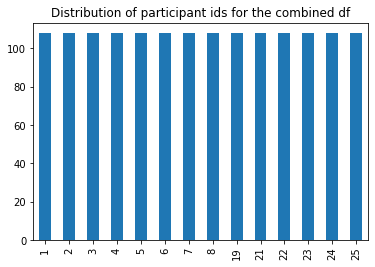

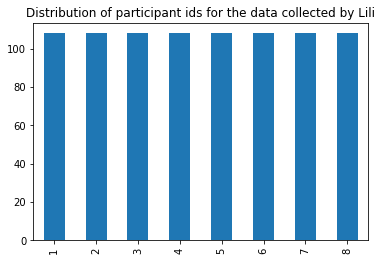

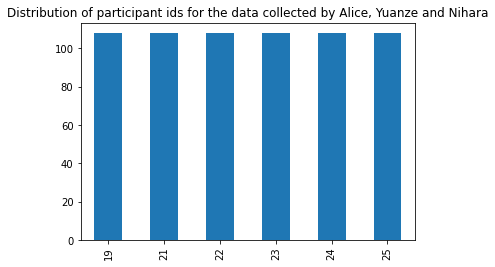

In [8]:
fig1 = plt.figure(f"Distribution of rating for the combined df")
combined_df['participant_id'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of participant ids for the combined df")

fig2 = plt.figure(f"Distribution of rating for the data collected by Lili")
df1['participant_id'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of participant ids for the data collected by Lili")

fig3 = plt.figure(f"Distribution of rating for the data collected by Alice, Yuanze and Nihara")
df2['participant_id'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of participant ids for the data collected by Alice, Yuanze and Nihara")



### Clothes id

Text(0.5, 1.0, 'Distribution of clothes ids for the data collected by Alice, Yuanze and Nihara')

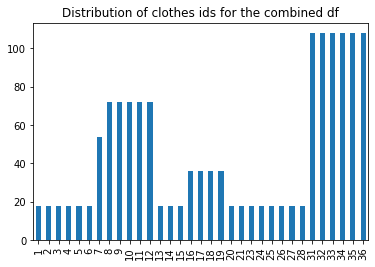

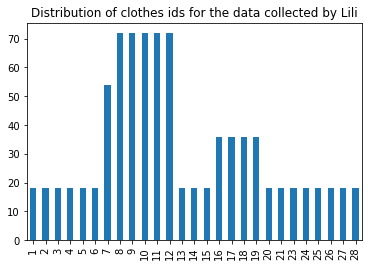

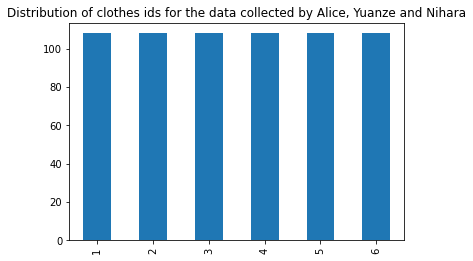

In [9]:
fig1 = plt.figure(f"Distribution of rating for the combined df")
combined_df['clothes_id'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of clothes ids for the combined df")

fig2 = plt.figure(f"Distribution of rating for the data collected by Lili")
df1['clothes_id'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of clothes ids for the data collected by Lili")

fig3 = plt.figure(f"Distribution of rating for the data collected by Alice, Yuanze and Nihara")
df2['clothes_id'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of clothes ids for the data collected by Alice, Yuanze and Nihara")



### Property name

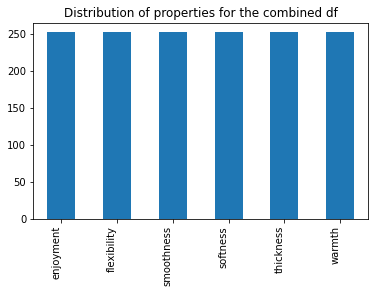

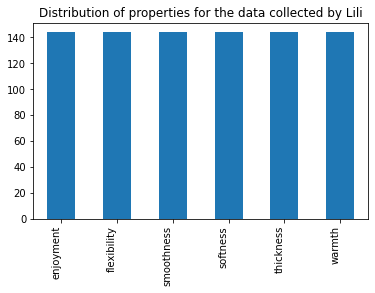

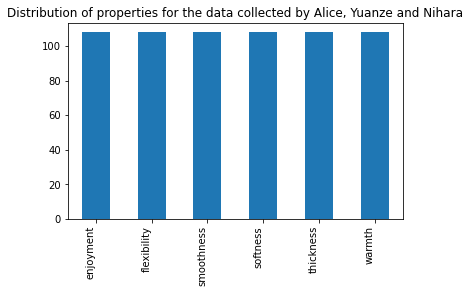

In [10]:
fig1 = plt.figure(f"Distribution of rating for the combined df")
combined_df['property_name'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of properties for the combined df")
plt.gcf().autofmt_xdate(rotation=90)

fig2 = plt.figure(f"Distribution of rating for the data collected by Lili")
df1['property_name'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of properties for the data collected by Lili")
plt.gcf().autofmt_xdate(rotation=90)

fig3 = plt.figure(f"Distribution of rating for the data collected by Alice, Yuanze and Nihara")
df2['property_name'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of properties for the data collected by Alice, Yuanze and Nihara")
plt.gcf().autofmt_xdate(rotation=90)


### Rating

Text(0.5, 1.0, 'Distribution of rating for the data collected by Alice, Yuanze and Nihara')

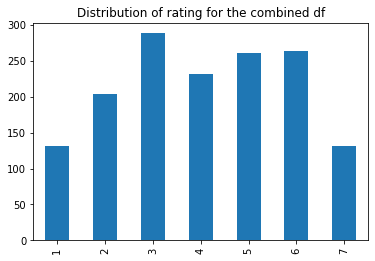

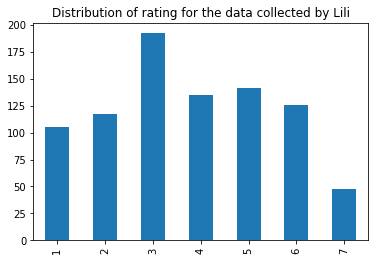

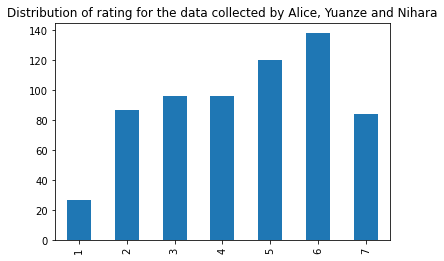

In [11]:
fig1 = plt.figure(f"Distribution of rating for the combined df")
combined_df['rating'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of rating for the combined df")

fig2 = plt.figure(f"Distribution of rating for the data collected by Lili")
df1['rating'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of rating for the data collected by Lili")

fig3 = plt.figure(f"Distribution of rating for the data collected by Alice, Yuanze and Nihara")
df2['rating'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of rating for the data collected by Alice, Yuanze and Nihara")


Text(0.5, 1.0, 'Distribution of rating for the data collected by Alice, Yuanze and Nihara')

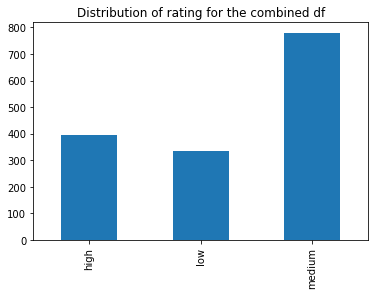

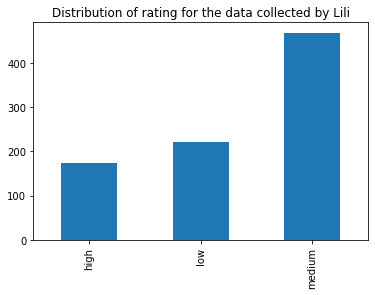

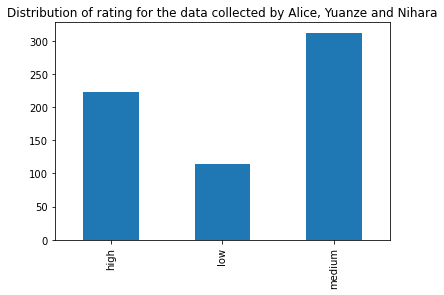

In [12]:
#levels_order = ['low', 'medium', 'high']
fig1 = plt.figure(f"Distribution of rating for the combined df")
combined_df['rating_level'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of rating for the combined df")

fig2 = plt.figure(f"Distribution of rating for the data collected by Lili")
df1['rating_level'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of rating for the data collected by Lili")

fig3 = plt.figure(f"Distribution of rating for the data collected by Alice, Yuanze and Nihara")
df2['rating_level'].value_counts().sort_index().plot.bar()
plt.title(f"Distribution of rating for the data collected by Alice, Yuanze and Nihara")

#field = "Day"
#day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#ax = df.set_index('rating_level').loc[levels_order].plot(kind="bar", legend=False)
#ax.set_ylabel("Value")


In [13]:
def plot_prop_rating(property_combined_df, property_df1, property_df2, property_name):
    fig1 = plt.figure(f"Distribution of rating for {property_name} (combined df)")
    property_combined_df['rating'].value_counts().sort_index().plot.bar()
    plt.title(f"Distribution of rating for {property_name} (combined df)")

    fig2 = plt.figure(f"Distribution of rating for {property_name} (Lili data)")
    property_df1['rating'].value_counts().sort_index().plot.bar()
    plt.title(f"Distribution of rating for {property_name} (Lili data)")

    fig3 = plt.figure(f"Distribution of rating for {property_name} (2022 data)")
    property_df2['rating'].value_counts().sort_index().plot.bar()
    plt.title(f"Distribution of rating for {property_name} (2022 data)")

def plot_prop_rating1(property_combined_df, property_df1, property_df2, property_name):
    fig1 = plt.figure(f"Distribution of rating for {property_name} (combined df)")
    property_combined_df['rating_level'].value_counts().sort_index().plot.bar()
    plt.title(f"Distribution of rating for {property_name} (combined df)")

    fig2 = plt.figure(f"Distribution of rating for {property_name} (Lili data)")
    property_df1['rating_level'].value_counts().sort_index().plot.bar()
    plt.title(f"Distribution of rating for {property_name} (Lili data)")

    fig3 = plt.figure(f"Distribution of rating for {property_name} (2022 data)")
    property_df2['rating_level'].value_counts().sort_index().plot.bar()
    plt.title(f"Distribution of rating for {property_name} (2022 data)")



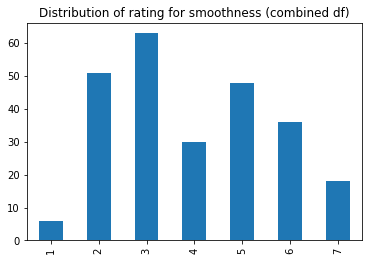

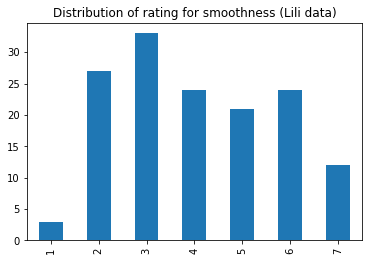

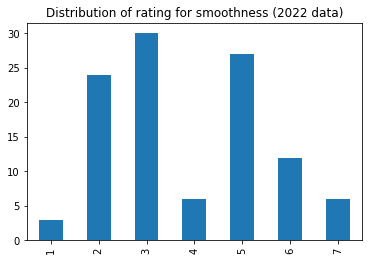

In [14]:
plot_prop_rating(smooth_df, smooth_df1, smooth_df2, 'smoothness')

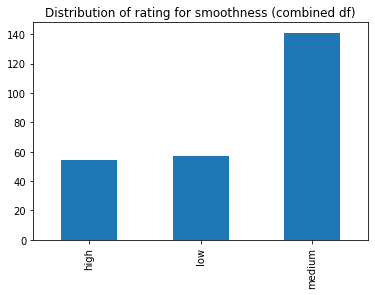

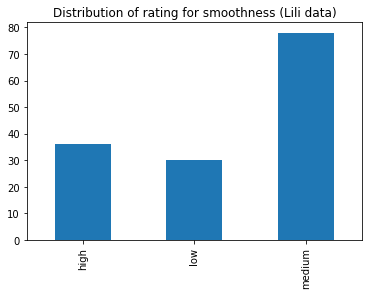

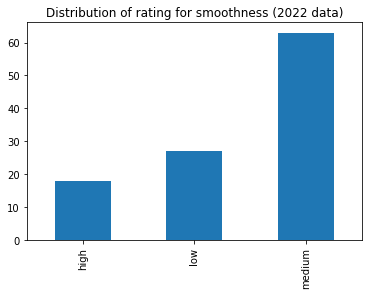

In [15]:
plot_prop_rating1(smooth_df, smooth_df1, smooth_df2, 'smoothness')

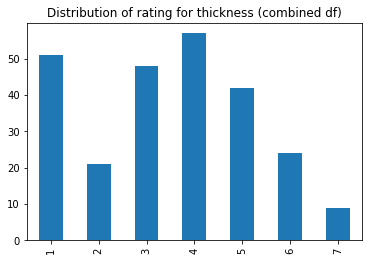

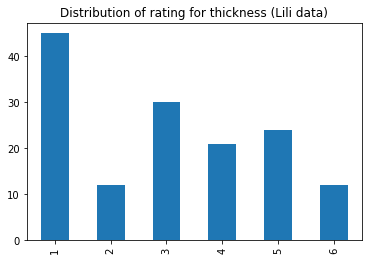

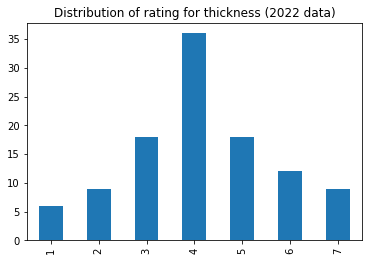

In [16]:
plot_prop_rating(thick_df, thick_df1, thick_df2, 'thickness')

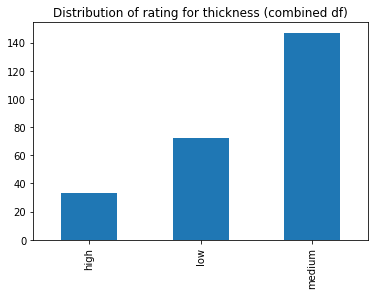

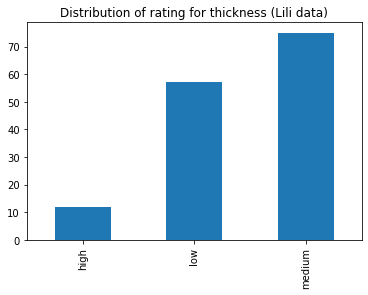

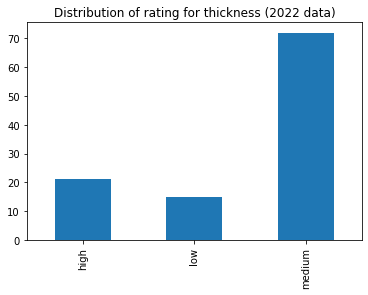

In [17]:
plot_prop_rating1(thick_df, thick_df1, thick_df2, 'thickness')

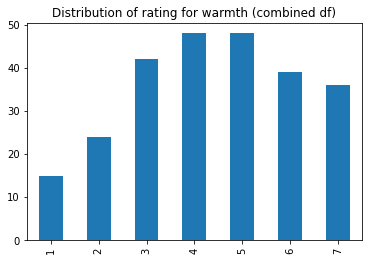

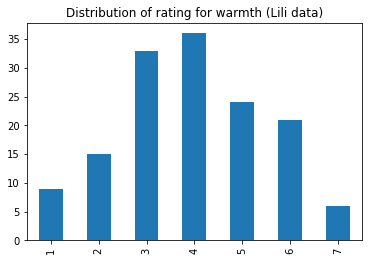

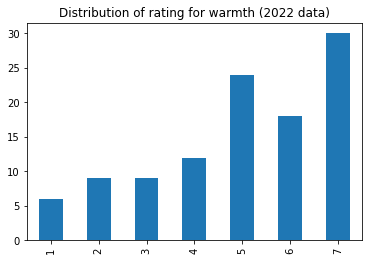

In [18]:
plot_prop_rating(warm_df, warm_df1, warm_df2, 'warmth')

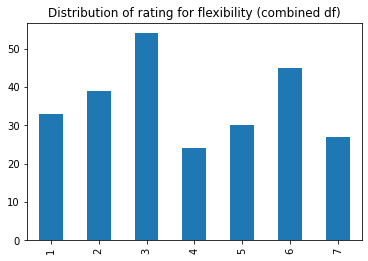

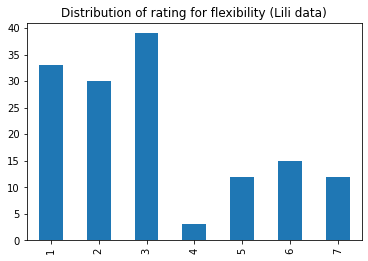

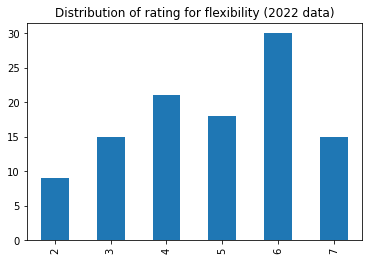

In [19]:
plot_prop_rating(flex_df, flex_df1, flex_df2, 'flexibility')

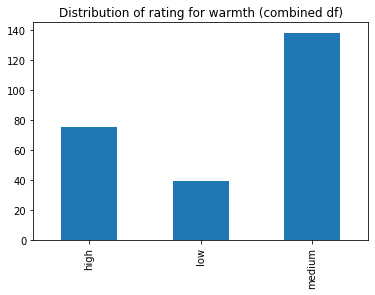

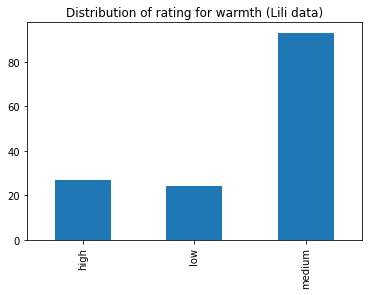

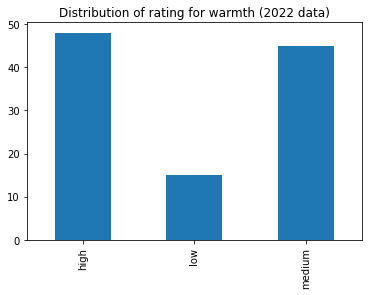

In [20]:
plot_prop_rating1(warm_df, warm_df1, warm_df2, 'warmth')

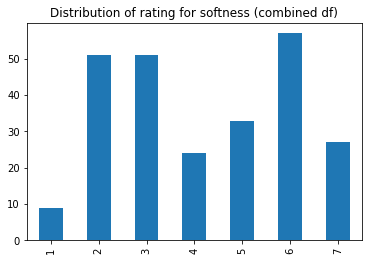

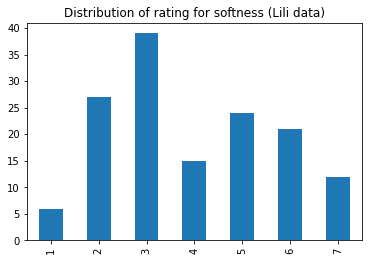

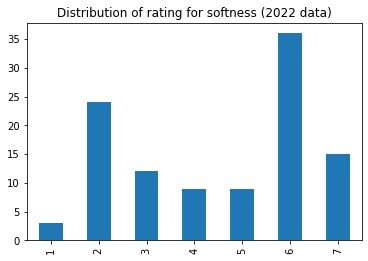

In [21]:
plot_prop_rating(soft_df, soft_df1, soft_df2, 'softness')

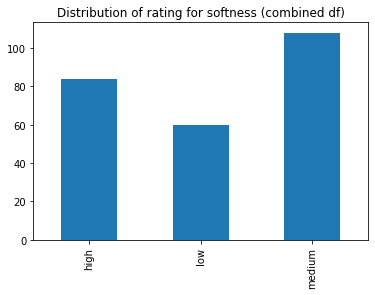

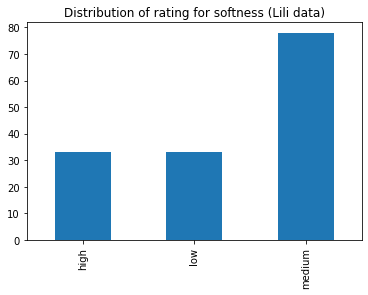

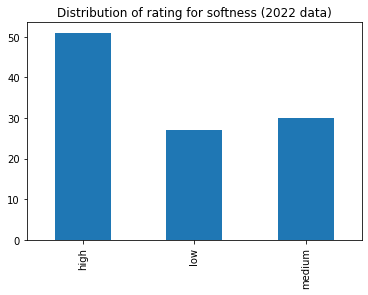

In [22]:
plot_prop_rating1(soft_df, soft_df1, soft_df2, 'softness')

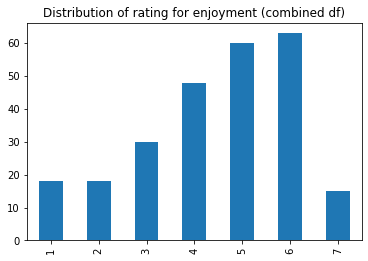

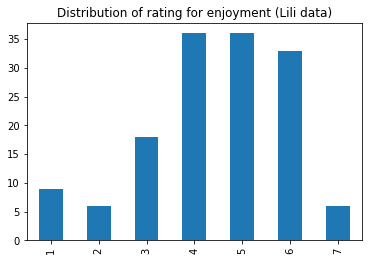

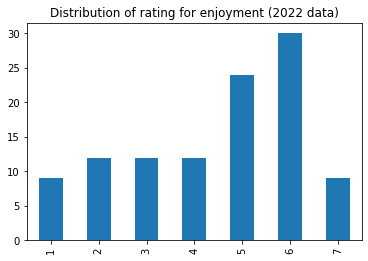

In [23]:
plot_prop_rating(enjoy_df, enjoy_df1, enjoy_df2, 'enjoyment')

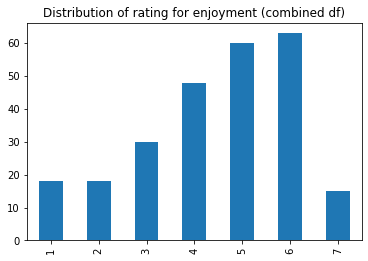

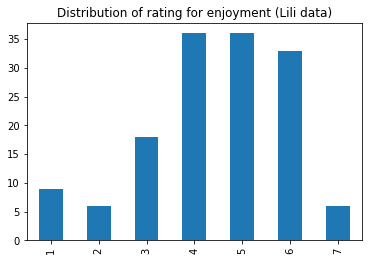

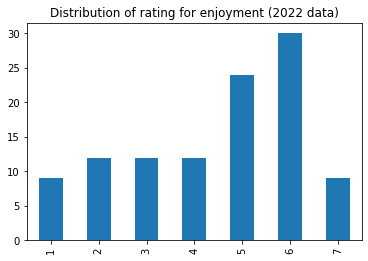

In [24]:
plot_prop_rating(enjoy_df, enjoy_df1, enjoy_df2, 'enjoyment')

### Relationship between properties and channels - Combined dataset

In [25]:
def create_timestep_dfs(df):
    df1 = df[df.sub_window_num == 1]
    df2 = df[df.sub_window_num == 2]
    df3 = df[df.sub_window_num == 3]
    
    return df1, df2, df3



In [26]:
def plot(property_df, property_name):
    df_t1, df_t2, df_t3 = create_timestep_dfs(property_df)
    df_t1.rename(columns={'mean_ch1_Hand0': 'ch1_0', 'mean_ch2_Hand0': 'ch2_0', 'mean_ch3_Hand0': 'ch3_0', 'mean_ch4_Hand0': 'ch4_0', 'mean_ch5_Hand0': 'ch5_0', 'mean_ch6_Hand0': 'ch6_0','mean_ch7_Hand0': 'ch7_0', 'mean_ch8_Hand0': 'ch8_0', 'mean_ch1_Hand1': 'ch1_1', 'mean_ch2_Hand1': 'ch2_1', 'mean_ch3_Hand1': 'ch3_1', 'mean_ch4_Hand1': 'ch4_1', 'mean_ch5_Hand1': 'ch5_1', 'mean_ch6_Hand1': 'ch6_1','mean_ch7_Hand1': 'ch7_1', 'mean_ch8_Hand1': 'ch8_1'}, inplace=True)
    fig1 = plt.figure(f"Emg data for {property_name} (subwindow 1)")
    print(df_t1.boxplot(column=['ch1_0', 'ch1_1', 'ch2_0', 'ch2_1', 'ch3_0', 'ch3_1', 'ch4_0', 'ch4_1', 'ch5_0', 'ch5_1', 'ch6_0', 'ch6_1', 'ch7_0', 'ch7_1', 'ch8_0', 'ch8_1'])) 
    plt.title(f"Emg data for {property_name} (subwindow 1)")
    plt.gcf().autofmt_xdate(rotation=90)

    df_t2.rename(columns={'mean_ch1_Hand0': 'ch1_0', 'mean_ch2_Hand0': 'ch2_0', 'mean_ch3_Hand0': 'ch3_0', 'mean_ch4_Hand0': 'ch4_0', 'mean_ch5_Hand0': 'ch5_0', 'mean_ch6_Hand0': 'ch6_0','mean_ch7_Hand0': 'ch7_0', 'mean_ch8_Hand0': 'ch8_0', 'mean_ch1_Hand1': 'ch1_1', 'mean_ch2_Hand1': 'ch2_1', 'mean_ch3_Hand1': 'ch3_1', 'mean_ch4_Hand1': 'ch4_1', 'mean_ch5_Hand1': 'ch5_1', 'mean_ch6_Hand1': 'ch6_1','mean_ch7_Hand1': 'ch7_1', 'mean_ch8_Hand1': 'ch8_1'}, inplace=True)
    fig2 = plt.figure(f"Emg data for {property_name} (subwindow 2)")
    print(df_t2.boxplot(column=['ch1_0', 'ch1_1', 'ch2_0', 'ch2_1', 'ch3_0', 'ch3_1', 'ch4_0', 'ch4_1', 'ch5_0', 'ch5_1', 'ch6_0', 'ch6_1', 'ch7_0', 'ch7_1', 'ch8_0', 'ch8_1'])) 
    plt.title(f"Emg data for {property_name} (subwindow 2)")
    plt.gcf().autofmt_xdate(rotation=90)


    df_t3.rename(columns={'mean_ch1_Hand0': 'ch1_0', 'mean_ch2_Hand0': 'ch2_0', 'mean_ch3_Hand0': 'ch3_0', 'mean_ch4_Hand0': 'ch4_0', 'mean_ch5_Hand0': 'ch5_0', 'mean_ch6_Hand0': 'ch6_0','mean_ch7_Hand0': 'ch7_0', 'mean_ch8_Hand0': 'ch8_0', 'mean_ch1_Hand1': 'ch1_1', 'mean_ch2_Hand1': 'ch2_1', 'mean_ch3_Hand1': 'ch3_1', 'mean_ch4_Hand1': 'ch4_1', 'mean_ch5_Hand1': 'ch5_1', 'mean_ch6_Hand1': 'ch6_1','mean_ch7_Hand1': 'ch7_1', 'mean_ch8_Hand1': 'ch8_1'}, inplace=True)
    fig3 = plt.figure(f"Emg data for {property_name} (subwindow 3)")
    print(df_t3.boxplot(column=['ch1_0', 'ch1_1', 'ch2_0', 'ch2_1', 'ch3_0', 'ch3_1', 'ch4_0', 'ch4_1', 'ch5_0', 'ch5_1', 'ch6_0', 'ch6_1', 'ch7_0', 'ch7_1', 'ch8_0', 'ch8_1'])) 
    plt.title(f"Emg data for {property_name} (subwindow 3)")
    plt.gcf().autofmt_xdate(rotation=90)



AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


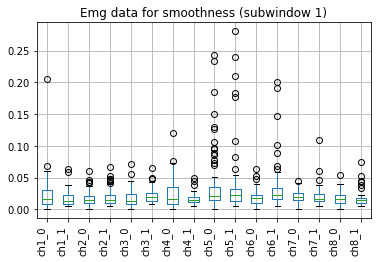

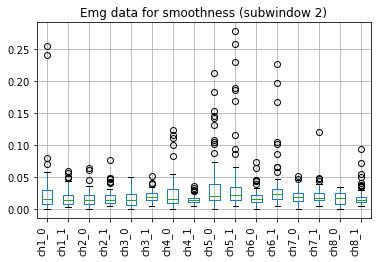

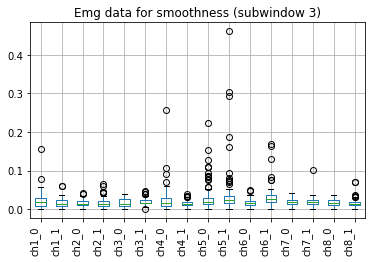

In [27]:
plot(smooth_df, 'smoothness')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


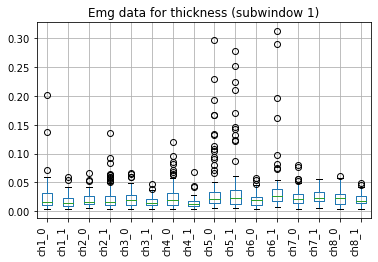

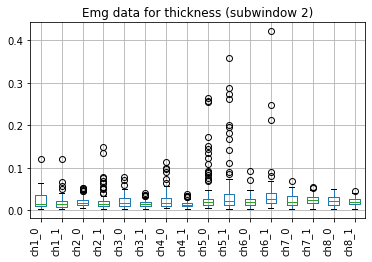

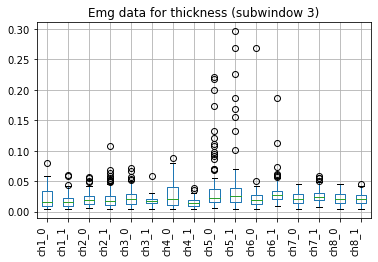

In [28]:
plot(thick_df, 'thickness')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


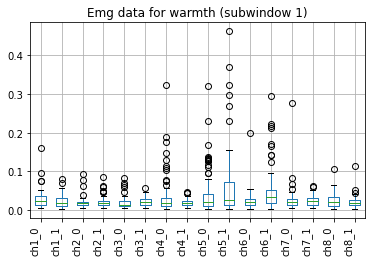

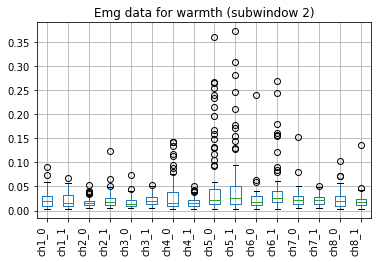

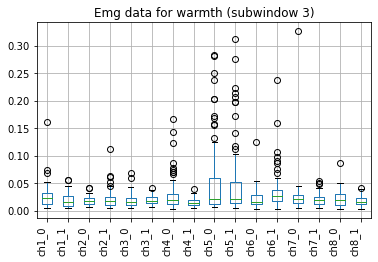

In [29]:
plot(warm_df, 'warmth')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


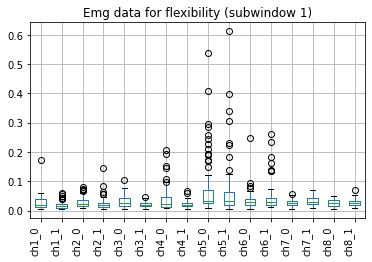

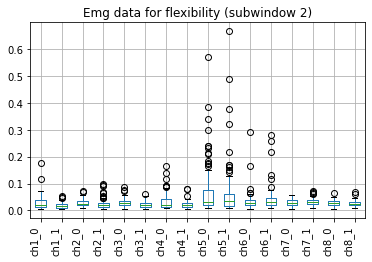

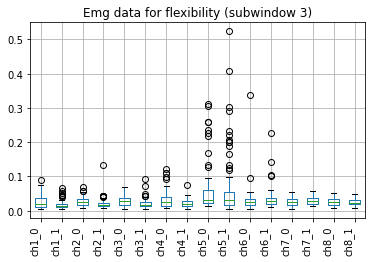

In [30]:
plot(flex_df, 'flexibility')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


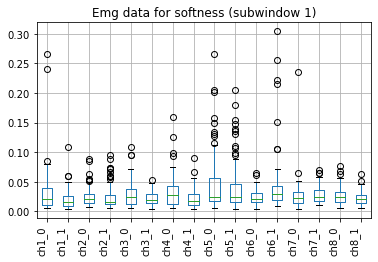

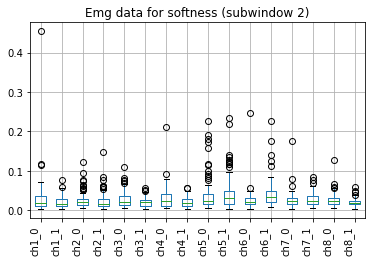

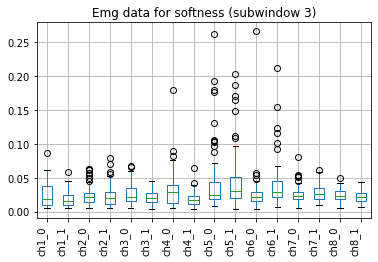

In [31]:
plot(soft_df, 'softness')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


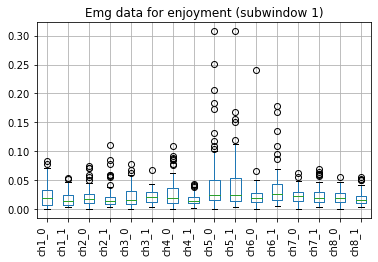

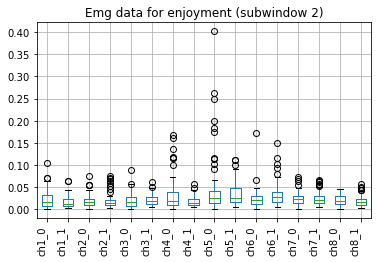

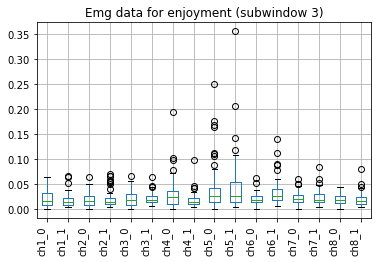

In [32]:
plot(enjoy_df, 'enjoyment')